# Dartsのインストール

In [ ]:
!pip install darts

# 必要なライブラリのインポート

In [20]:
import pandas as pd
from darts import TimeSeries 
from darts.datasets import AirPassengersDataset
from darts.metrics import mape

# データのロードと可視化

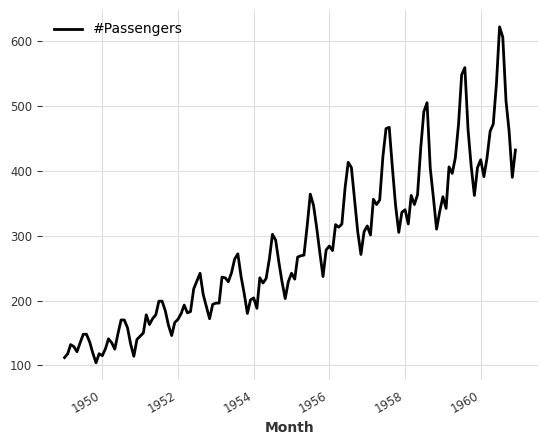

In [21]:
series = AirPassengersDataset().load()
series.plot()

# データの分割

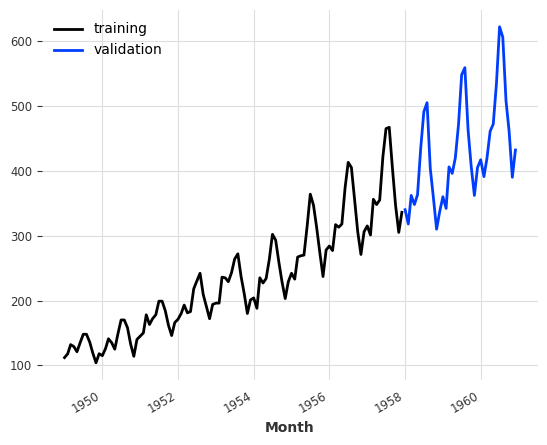

In [22]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

# 学習と評価

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | layer         | Linear           | 300   
---------------------------------------------------
300       Trainable params
0         Non-trainable params
300       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE: 13.64880921740427


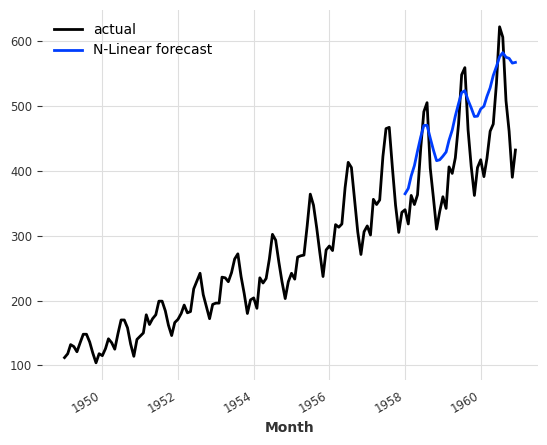

In [23]:
# N-Linear
from darts.models import NLinearModel

nlinear_model = NLinearModel(input_chunk_length=24, output_chunk_length=12)
nlinear_model.fit(train)
nlinear_forecast = nlinear_model.predict(36)

series.plot(label="actual")
nlinear_forecast.plot(label="N-Linear forecast")

print("MAPE:", mape(nlinear_forecast, val))

MAPE: 4.956859918473163


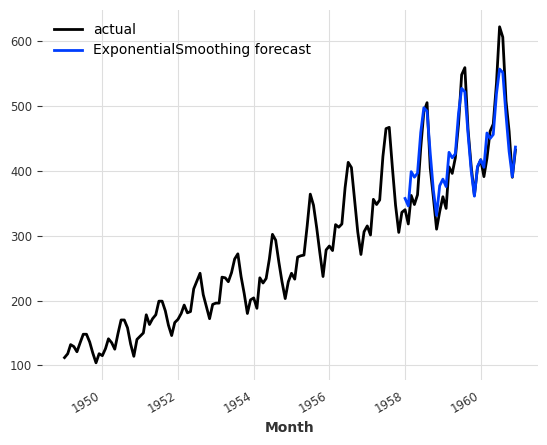

In [24]:
# ExponentialSmoothing
from darts.models import ExponentialSmoothing

exponential_smoothing_model = ExponentialSmoothing() 
exponential_smoothing_model.fit(train)
exponential_smoothing_forecast = exponential_smoothing_model.predict(36)

series.plot(label="actual")
exponential_smoothing_forecast.plot(label="ExponentialSmoothing forecast")

print("MAPE:", mape(exponential_smoothing_forecast, val))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE: 19.970891399072023


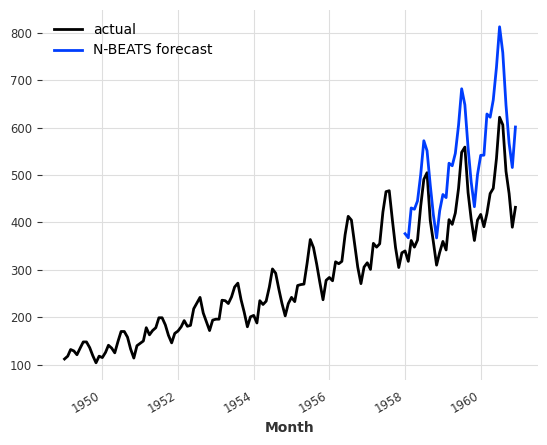

In [25]:
# NBEATSModel
from darts.models import NBEATSModel

nbeats_model = NBEATSModel(input_chunk_length=24, output_chunk_length=12)
nbeats_model.fit(train)
nbeats_forecast = nbeats_model.predict(36)

series.plot(label="actual")
nbeats_forecast.plot(label="N-BEATS forecast")

print("MAPE:", mape(nbeats_forecast, val))

19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 8.915652732889862


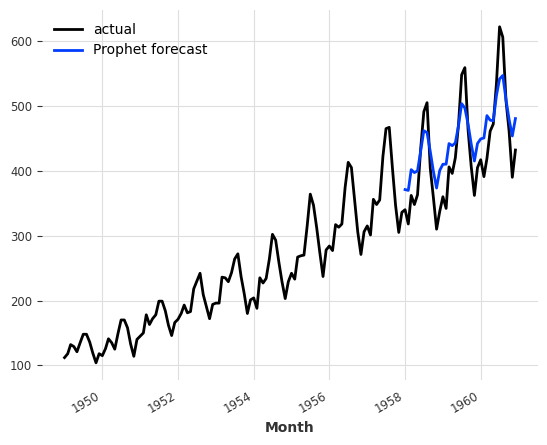

In [26]:
# Facebook Prophet
from darts.models import Prophet

prophet_model = Prophet()
prophet_model.fit(train)
prophet_forecast = prophet_model.predict(36)

series.plot(label="actual")
prophet_forecast.plot(label="Prophet forecast")

print("MAPE:", mape(prophet_forecast, val))